#### OOD GANS Walkthrough

In [1]:
import sys
sys.path.insert(0, '../')

In [11]:
from config import *
from dataset import MNIST,CIFAR10, MNIST_SUB
from models.mnist_cnn import MNISTCNN
from models.hparam import HParam
from models.gans import *
from models.dc_gan_model import *
from utils import *
# from trainer import train # Not needed for OOD GANS

# import autoreload code
# %load_ext autoreload
# %autoreload 2

### Dataset Processing


In [3]:
mnist_tri_set, mnist_val_set, mnist_tri_loader, mnist_val_loader = MNIST(128, 32, 2, True)
cifar_tri_set, cifar_val_set , cifar_tri_loader, cifar_val_loader = CIFAR10(128, 32)
# USE MNIST SUBSAMPLES
ind_idx = [0,2,3,6,8]
ood_idx = [1,7]
# TODO: Use classifier on 1,4,5,7,9, check wass loss
# test_idx = [4,5,9]
mnist_dset_dict = MNIST_SUB(batch_size=128, val_batch_size=64, idx_ind=ind_idx, idx_ood=ood_idx, shuffle=True)
# TODO: Show dataset statistics and sample images.

Files already downloaded and verified
Files already downloaded and verified


### Original GANS Implementation

In [ ]:
D = discriminator(gan_type=GAN_TYPE.NAIVE).to(DEVICE)
G = generator().to(DEVICE)
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss, gan_type=GAN_TYPE.NAIVE)

### Original Deep Convolutional GAN Implementation

In [ ]:
D = dc_discriminator().to(DEVICE)
G = dc_generator().to(DEVICE)
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss, gan_type=GAN_TYPE.NAIVE)

### OOD GAN Sample Training with Logger



Iter: 0, D: 0.8443, G:0.2941


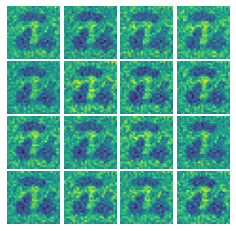


Iter: 100, D: -2.051, G:0.4788


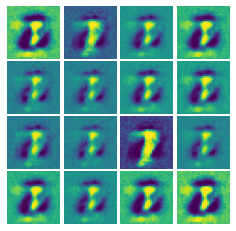


Iter: 200, D: -2.482, G:0.5028


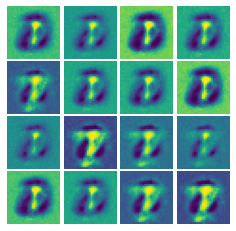


Iter: 300, D: -2.998, G:1.041


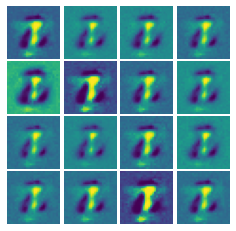


Iter: 400, D: -2.524, G:0.2923


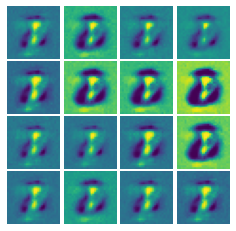


Iter: 500, D: -2.848, G:0.686


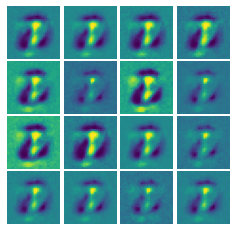


Iter: 600, D: -3.103, G:1.143


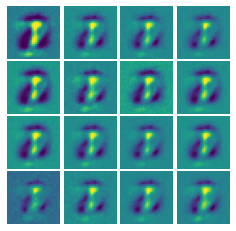


Iter: 700, D: -2.967, G:0.4773


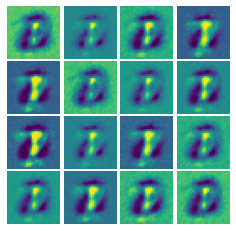


Iter: 800, D: -3.077, G:0.7401


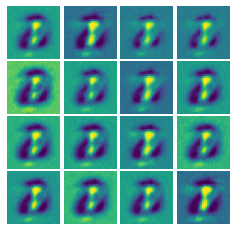


Iter: 900, D: -3.495, G:0.8282


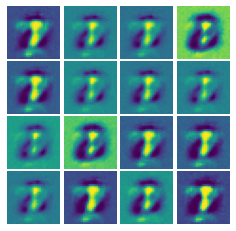


Iter: 1000, D: -3.592, G:0.9921


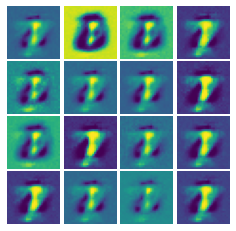


Iter: 1100, D: -4.105, G:1.366


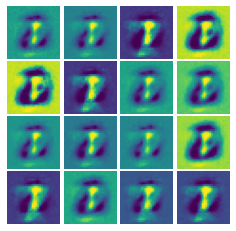


Iter: 1200, D: -4.761, G:1.361


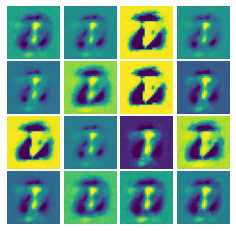


Iter: 1300, D: -5.296, G:2.309


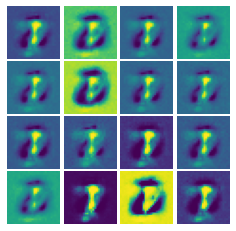


Iter: 1400, D: -5.046, G:1.85


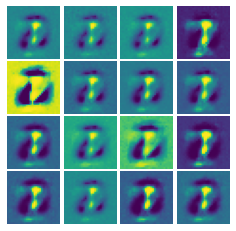


Iter: 1500, D: -5.675, G:2.141


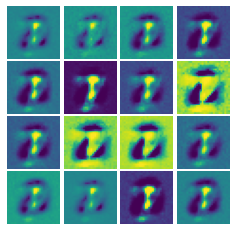


Iter: 1600, D: -6.324, G:2.282


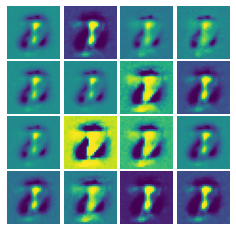


Iter: 1700, D: -7.179, G:2.812


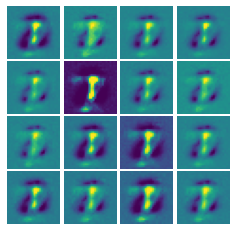


Iter: 1800, D: -7.505, G:3.246


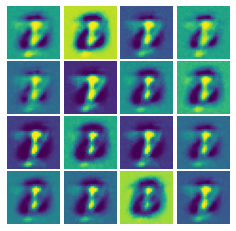


Iter: 1900, D: -5.567, G:1.249


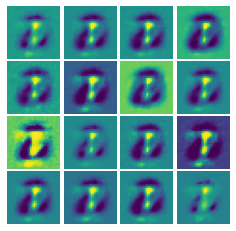


Iter: 2000, D: -5.789, G:1.607


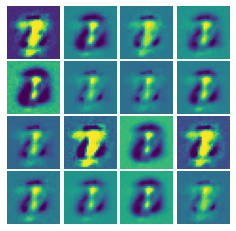


Iter: 2100, D: -6.809, G:2.78


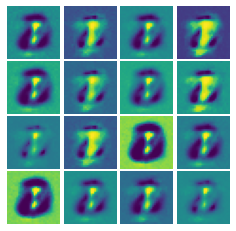


Iter: 2200, D: -7.756, G:3.374


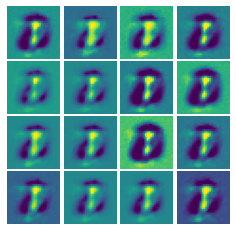


Iter: 2300, D: -6.118, G:1.909


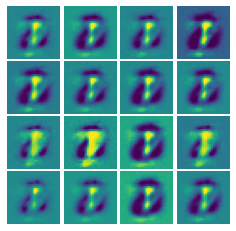

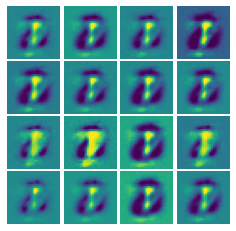

In [7]:
# TODO: Launch this on Google Colab
D = discriminator(gan_type=GAN_TYPE.OOD).to(DEVICE)
G = generator().to(DEVICE)
# Training with Loss Tracker (for debugging)
logger = Logger(10000)

g_d_steps_ratios = 2
hp_set = [HParam(0.1, 1, 1), HParam(0.2,1,1), HParam(0.1, 0.2, 0.2), HParam(0.2,0.5, 0.5)]
logger_max_iter = 2500
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
ind_train_loader = mnist_dset_dict['train_set_ind_loader']
ood_train_loader = mnist_dset_dict['train_set_ood_loader']
gan_trainer(ind_train_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss, g_d_ratio=g_d_steps_ratios,
            gan_type=GAN_TYPE.OOD, show_every=100,ood_loader=ood_train_loader,logger=logger, 
            logger_max_iter=logger_max_iter)
# gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
#             discriminator_loss, generator_loss,
#             gan_type=GAN_TYPE.OOD, ood_img_sample=CIFAR10,gd_ls_tracker=GDlsTracker, 
#             gd_ls_track_iter=1000)

In [ ]:
from utils import *
# folder_name = 'mnist_[r=2]/'
folder_name = ''
# logger.plt_ls(save_fname=folder_name+'g_loss_mnist', num_iter=logger_max_iter*g_d_steps_ratios, type=GD.G)
# logger.plt_ls(save_fname=folder_name+'d_loss_mnist', num_iter=logger_max_iter, type=GD.D)
logger.plt_ls(save_fname=folder_name+'g_loss_mnist', num_iter=4640, type=GD.G)
logger.plt_ls(save_fname=folder_name+'d_loss_mnist', num_iter=2320, type=GD.D)

### OOD GANs training with hyperparameter tuning


In [ ]:
# TODO: Launch this on Google Colab
D = discriminator(gan_type=GAN_TYPE.OOD).to(DEVICE)
G = generator().to(DEVICE)
# Training with Logger (for debugging)
logger_1 = Logger(10000)

g_d_steps_ratios = 2
hp_set = [HParam(0.1, 1, 1), HParam(0.2,1,1), HParam(0.1, 0.2, 0.2), HParam(0.2,0.5, 0.5)]
logger_max_iter = 500
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
ind_train_loader = mnist_dset_dict['train_set_ind_loader']
ood_train_loader = mnist_dset_dict['train_set_ood_loader']
gan_trainer(ind_train_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss, g_d_ratio=g_d_steps_ratios,
            gan_type=GAN_TYPE.OOD, show_every=100,ood_loader=ood_train_loader,logger=logger_1, 
            logger_max_iter=logger_max_iter)

ic| 'The total loss of G and D can be accessed now.'


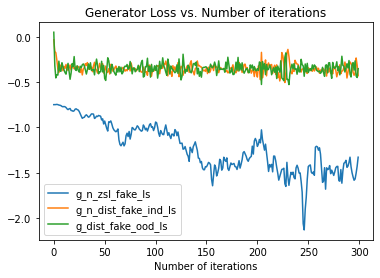

ic| 'The total loss of G and D can be accessed now.'


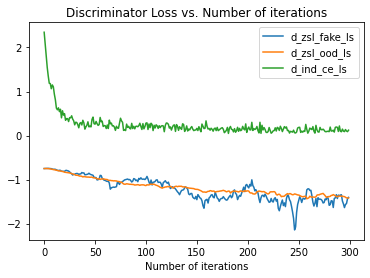

In [12]:
from utils import *
logger_1.plt_ls(save_fname='512_g_loss_mnist', num_iter=300, type=GD.G)
logger_1.plt_ls(save_fname='512_d_loss_mnist', num_iter=300, type=GD.D)

In [15]:
d_zsl_fake = logger_1.d_zsl_fake
d_zsl_ood = logger_1.d_zsl_ood
d_ind_ce = logger_1.d_ind_ce

g_zsl_fake = logger_1.g_n_zsl_fake
g_n_zsl_fake = [-elt for elt in g_zsl_fake]
g_n_dist_fake_ind = logger_1.g_n_dist_fake_ind
g_dist_fake_ood = logger_1.g_dist_fake_ood

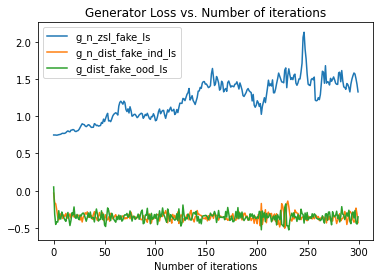

In [18]:
num_iter = 300
x_axis = np.arange(num_iter)
plt.plot(
    x_axis, g_n_zsl_fake[0:num_iter], label='g_n_zsl_fake_ls')
plt.plot(
    x_axis, g_n_dist_fake_ind[0:num_iter], label='g_n_dist_fake_ind_ls')
plt.plot(
    x_axis, g_dist_fake_ood[0:num_iter], label='g_dist_fake_ood_ls')
# plt.plot(x_axis, self.g_total[0:num_iter],
#  marker='^', label='g_total_ls')
plt.legend()
# plt.figure(dpi=100)
plt.xlabel("Number of iterations")
plt.title("Generator Loss vs. Number of iterations")
plt.savefig(GD_LOSS_PLOT_ADDR + 'pg' + f'[{num_iter}].jpg')
plt.show()
plt.close()